Importing the libraries

In [2]:
import csv
import math
from matplotlib import pyplot as plt

Create the BasicStatistics class

In [3]:
class BasicStatistics:
    """
    Basic statistics class

    Attributes:
        dataset: list of numbers

    Methods:
        mean: calculates the mean of the dataset
        median: calculates the median of the dataset
        variance: calculates the variance of the dataset
        normalize: normalizes the dataset
        plot: plots the dataset
    """
    def __init__(self, dataset):
        """
        Constructor for the BasicStatistics class
        :param dataset: list of numbers
        """
        self.dataset = dataset

    def mean(self):
        """
        Calculates the mean of the dataset
        :return: mean of the dataset
        """
        return sum(self.dataset) / len(self.dataset)

    def median(self):
        """
        Calculates the median of the dataset
        :return: median of the dataset
        """
        tmp_dataset = self.dataset.copy()
        tmp_dataset.sort()
        if len(tmp_dataset) % 2 == 0:
            return (tmp_dataset[len(tmp_dataset) // 2] + tmp_dataset[len(tmp_dataset) // 2 - 1]) / 2
        else:
            return tmp_dataset[len(tmp_dataset) // 2]

    def variance(self):
        """
        Calculates the variance of the dataset
        :return: variance of the dataset
        """
        return sum([(x - self.mean()) ** 2 for x in self.dataset]) / len(self.dataset)

    def normalize(self):
        """
        Normalizes the dataset
        :return normalized dataset
        """
        return [(x - self.mean()) / self.variance() for x in self.dataset]

    def standard_deviation(self):
        """
        Calculates the standard deviation of the dataset
        :return: standard deviation of the dataset
        """
        return math.sqrt(self.variance())

    def plot(self):
        """
        Plots the dataset
        :return:
        """
        # get the data
        mean = self.mean()
        median = self.median()
        variance = self.variance()
        std = math.sqrt(variance)
        data_norm = self.normalize()
        # get the number of bins
        nrBins = math.floor(len(self.dataset) / 50)

        # set up figure and plot grid
        fig = plt.figure(figsize=(10, 8))
        grid = plt.GridSpec(2, 2)
        ax1 = plt.subplot(grid[:1, :])
        ax2 = plt.subplot(grid[1:, :1])
        ax3 = plt.subplot(grid[1:, 1:])

        # set titles
        fig.suptitle('Basic Statistics')
        ax1.set_title('Data Distribution')
        ax2.set_title('Raw Data')
        ax3.set_title('Normalized Data')

        # set axes
        ax1.set_xlabel('Values')
        ax1.set_ylabel('Frequency')
        ax2.set_xlabel('Sample')
        ax2.set_ylabel('Value')
        ax3.set_xlabel('Sample')
        ax3.set_ylabel('Standardized Value')

        # data plotting
        ax1.hist(data, bins=nrBins, density=True, label='Histogram')
        ax1.vlines(x=mean, ymin=0, ymax=0.3, colors='r', ls='--', label='Mean')
        ax1.vlines(x=median, ymin=0, ymax=0.3, colors='y', ls='--', label='Median')
        ax1.vlines(x=mean + std, ymin=0, ymax=0.3, colors='g', ls='--', label='Standard deviation')
        ax1.vlines(x=mean - std, ymin=0, ymax=0.3, colors='g', ls='--')
        ax1.legend()
        # raw data plotting
        x = [i for i in range(1, len(data) + 1)]
        ax2.scatter(x, data, s=3, label='Data')
        ax2.hlines(y=mean, xmin=0, xmax=len(data), colors='r', ls='--', label='Mean')
        ax2.hlines(y=mean + std, xmin=0, xmax=len(data), colors='g', ls='--', label='Standard deviation')
        ax2.hlines(y=mean - std, xmin=0, xmax=len(data), colors='g', ls='--')
        ax2.legend()
        # normalized data plotting
        ax3.scatter(x, data_norm, s=3, label='Data')
        ax3.hlines(y=0, xmin=0, xmax=len(data), colors='r', ls='--', label='Mean')
        ax3.hlines(y=0 + 1, xmin=0, xmax=len(data), colors='g', ls='--', label='Standard deviation')
        ax3.hlines(y=0 - 1, xmin=0, xmax=len(data), colors='g', ls='--')
        ax3.legend()

        plt.show()
        # save the figure
        fig.savefig("Basic_Statistics.png", format="png")


Demonstrate the BasicStatistics class on the data.csv file

Mean: 4.08
Median: 4.13
Variance: 4.15


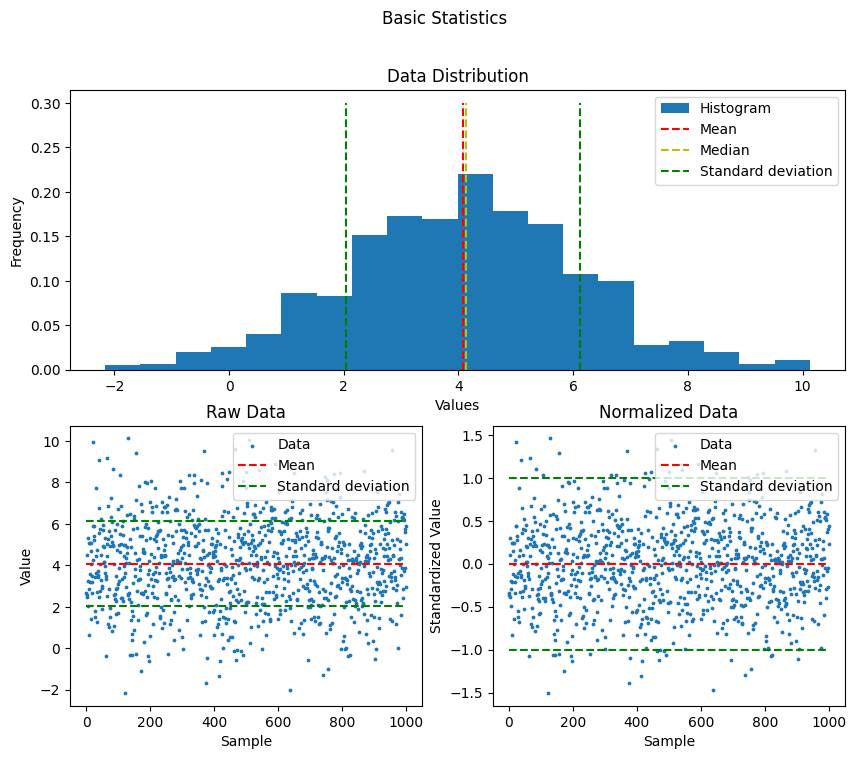

In [4]:
# define the path to the data file
path = 'data.csv'
# open the file and read the data
with open(path, 'r') as f:
    # create a csv reader
    reader = csv.reader(f)
    # convert the data to a list of floats
    data = list(reader)
    data = [float(x[0]) for x in data]
    # create a BasicStatistics object
    bs = BasicStatistics(data)
    # print the mean, median, and variance
    print(f'Mean: {bs.mean():.2f}')
    print(f'Median: {bs.median():.2f}')
    print(f'Variance: {bs.variance():.2f}')
    # plot the data
    bs.plot()